<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Sep8-9/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Reproducir los ejemplos mostrados en https://github.com/DCI-alxogm/ML2023/blob/main/Sep8-9/LR_SKLearn_keras.ipynb  respecto al uso de scikit-learn y keras.



# **Scikit-Learn**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data
houses = np.loadtxt("/content/drive/MyDrive/Data/houses.txt",delimiter = ',')
Xh = houses[:,:4]
th = houses[:,4]
labels = ["Tamaño","# Habitaciones", "Pisos", "Años"]

In [ ]:
#Ahora tenemos una matriz de 100 filas y 4 columnas
Xh.shape

(100, 4)

In [ ]:
#Normalizamos los datos con Sklearn
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

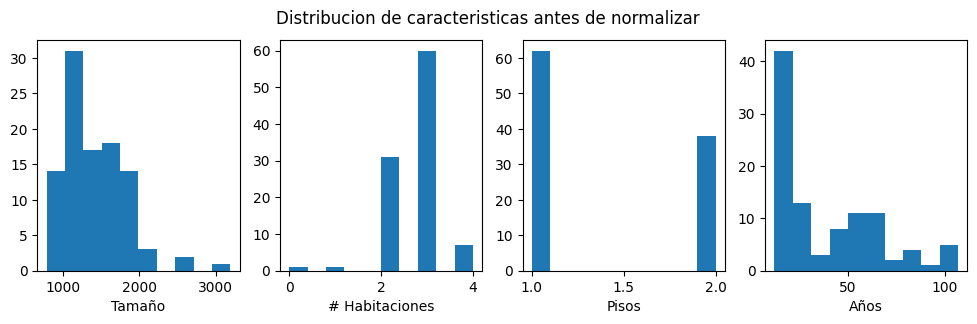

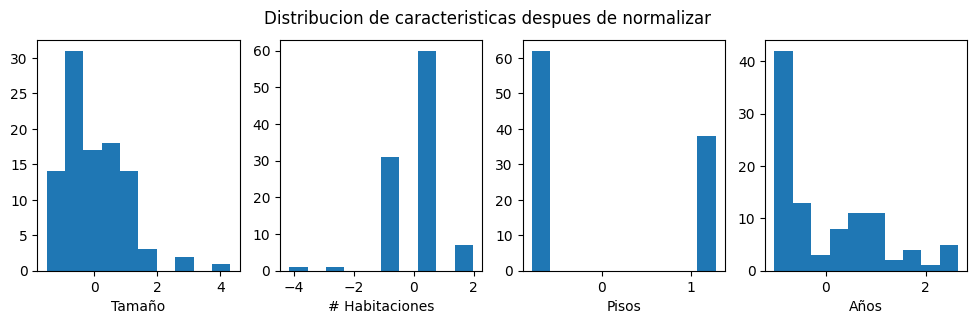

In [ ]:
#Ploteamos primero los datos sin normalizar
fig,ax = plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
  ax[i].hist(Xh[:,i])
  ax[i].set_xlabel(labels[i])

fig.suptitle("Distribucion de caracteristicas antes de normalizar")
plt.show()

#Ahora ploteamos los datos normalziados
fig,ax = plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
  ax[i].hist(Xh_norm[:,i])
  ax[i].set_xlabel(labels[i])

fig.suptitle("Distribucion de caracteristicas despues de normalizar")
plt.show()

In [ ]:
#Implementamos el metodo Stochastic Gradient Descent a nuestros datos
sgdr = SGDRegressor(max_iter=1000, learning_rate = 'constant', eta0 = 0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
Number of iterations completed: 33, number of weight updates: 3301.0


In [ ]:
#Calculamos los pesos involucrados
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters:   w0: {w0_norm}, w:{w_norm}")

Model parameters:   w0: [361.84119773], w:[110.62144946 -21.60945128 -32.62700888 -38.44809958]


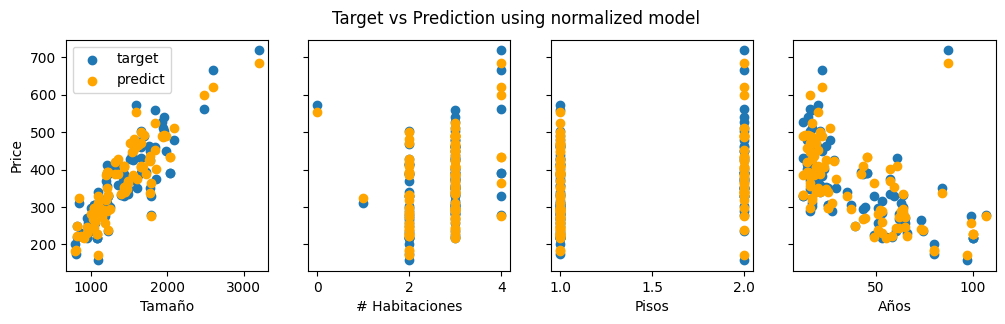

In [ ]:
#Predecimos el objetivo usando las caracteristicas normalizadas
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp += w_norm[i]*Xh_norm[:,i]

#Ploteamos las predicciones y objetivos vs las caracteristias originales
fig,ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(Xh[:,i], th, label = 'target')
  ax[i].scatter(Xh[:,i], yp, color = "orange", label = 'predict')
  ax[i].set_xlabel(labels[i])

ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Target vs Prediction using normalized model")
plt.show()

In [ ]:
#Dividimos en muestras de entrenamiento y muestra de prueba
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [ ]:
#Solving using Scikit Learn
sgdr = SGDRegressor(max_iter=100, loss = "squared_error", learning_rate = 'constant', eta0 = 0.01, penalty = None)
sgdr.fit(X_train,y_train)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weigth updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
Number of iterations completed: 33, number of weigth updates: 2311.0


In [ ]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"Model parameters:   w0: {w0_norm}, w: {w_norm}")

Model parameters:   w0: [361.13429246], w: [110.35139228 -22.83503096 -35.26836642 -38.43340588]


In [ ]:
#Test score
sgdr.score(X_test,y_test)

0.9615281075038129

# **Keras**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [126]:
np.random.seed(2)
model = Sequential()

In [121]:
input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim = input_dim, activation = 'linear'))
sgd = SGD(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer = sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 100
batch_size = X_train.shape[0]
history = model.fit(X_train, y_train, epochs = num_epochs, batch_size = batch_size)

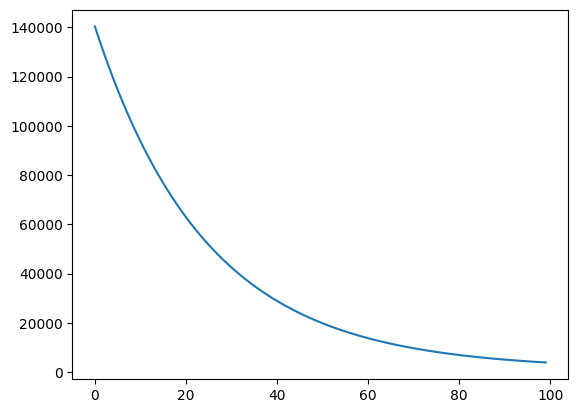

In [ ]:
#Convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

#Use pandas native plot method
history_df['loss'].plot();

In [ ]:
history2= model.fit(X_train, y_train, epochs = num_epochs, batch_size = batch_size)

In [ ]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 82.34615 ]
 [ -9.5903  ]
 [-23.649231]
 [-47.307938]] [354.11362]


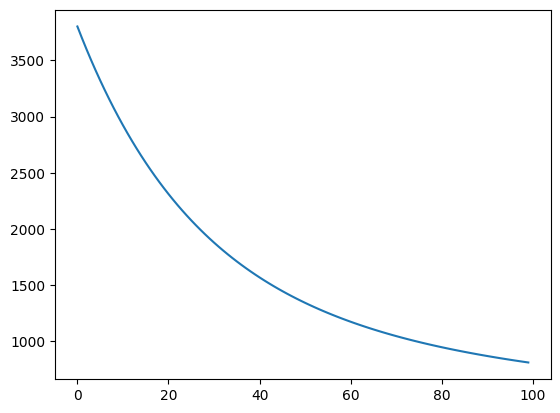

In [ ]:
#Convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)

#Use Pandas native plot method
history_df['loss'].plot();

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
score

1177.68505859375


2.   Usar el método de gradiente descendiente para modelar un conjunto de datos de su elección, hacerlo usando las librerias de sckit-learn y keras, comparar resultados.



In [104]:
#Load data
calif = np.loadtxt("/content/drive/MyDrive/Data/calificaciones.txt",delimiter = ',')
Xh1 = calif[:,1:3]
th1 = calif[:,0]
labels = ["Horas de Estudio", "Ansiedad"]

In [105]:
Xh1.shape

(44, 2)

In [106]:
#Normalizamos los datos con Sklearn
scaler = StandardScaler()
Xh1_norm = scaler.fit_transform(Xh1)

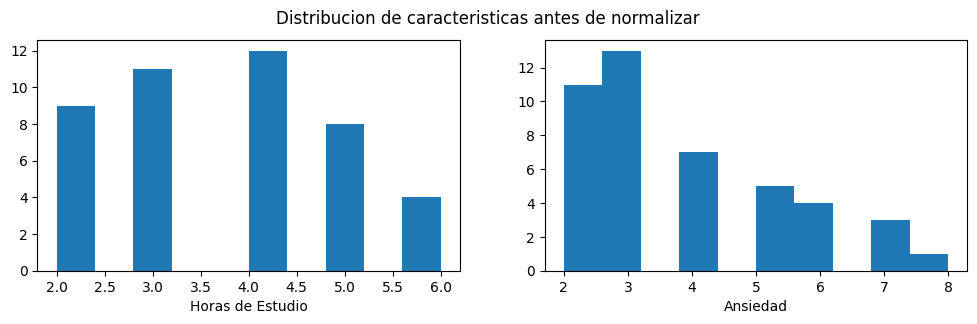

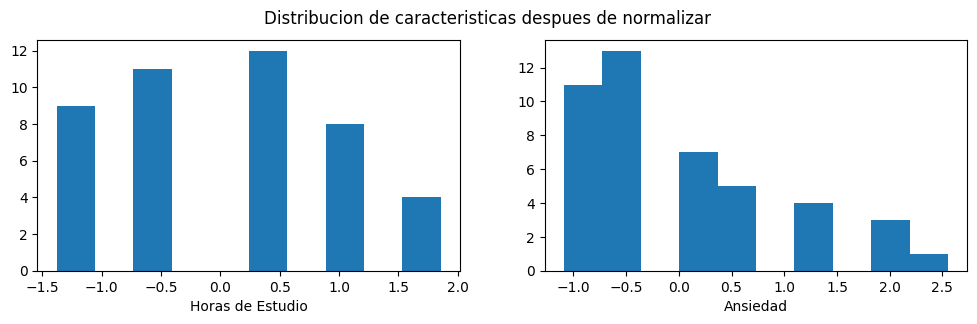

In [107]:
#Ploteamos primero los datos sin normalizar
fig,ax = plt.subplots(1, 2, figsize=(12, 3))

for i in range(len(ax)):
  ax[i].hist(Xh1[:,i])
  ax[i].set_xlabel(labels[i])

fig.suptitle("Distribucion de caracteristicas antes de normalizar")
plt.show()

#Ahora ploteamos los datos normalziados
fig,ax = plt.subplots(1, 2, figsize=(12, 3))

for i in range(len(ax)):
  ax[i].hist(Xh1_norm[:,i])
  ax[i].set_xlabel(labels[i])

fig.suptitle("Distribucion de caracteristicas despues de normalizar")
plt.show()

In [108]:
#Implementamos el metodo Stochastic Gradient Descent a nuestros datos
sgdr1 = SGDRegressor(max_iter=1000, learning_rate = 'constant', eta0 = 0.01)
sgdr1.fit(Xh1_norm, th1)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
Number of iterations completed: 33, number of weight updates: 2311.0


In [109]:
#Calculamos los pesos involucrados
w0_norm1 = sgdr1.intercept_
w_norm1 = sgdr1.coef_
print(f"Model parameters:   w0: {w0_norm1}, w:{w_norm1}")

Model parameters:   w0: [81.22394715], w:[ 7.48996142 -1.31204053]


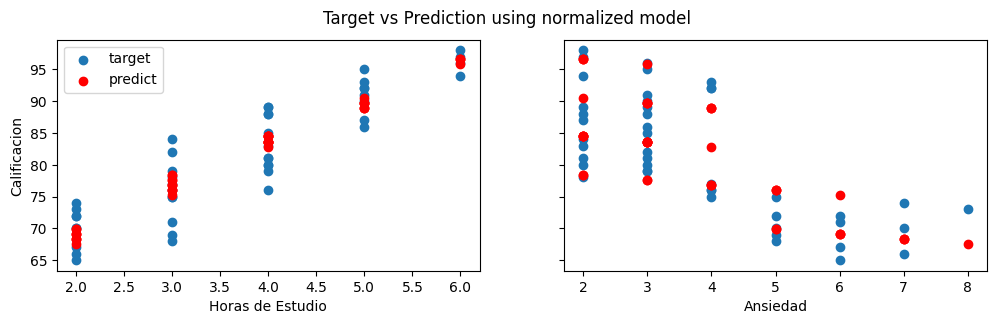

In [110]:
#Predecimos el objetivo usando las caracteristicas normalizadas
yp1 = w0_norm1[0]
for i in range(len(w_norm1)):
  yp1 += w_norm1[i]*Xh1_norm[:,i]

#Ploteamos las predicciones y objetivos vs las caracteristias originales
fig,ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(Xh1[:,i], th1, label = 'target')
  ax[i].scatter(Xh1[:,i], yp1, color = "red", label = 'predict')
  ax[i].set_xlabel(labels[i])

ax[0].set_ylabel("Calificacion"); ax[0].legend();
fig.suptitle("Target vs Prediction using normalized model")
plt.show()

In [111]:
#Dividimos en muestras de entrenamiento y muestra de prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(Xh1_norm, th1, test_size=0.30, random_state=42)

In [116]:
#Solving using Scikit Learn
sgdr1 = SGDRegressor(max_iter=100, loss = "squared_error", learning_rate = 'constant', eta0 = 0.01, penalty = None)
sgdr1.fit(X1_train,y1_train)
print(sgdr1)
print(f"Number of iterations completed: {sgdr1.n_iter_}, number of weigth updates: {sgdr1.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
Number of iterations completed: 42, number of weigth updates: 1261.0


In [117]:
#Test score
sgdr1.score(X1_test, y1_test)

0.7915406069067951

Ahora con Keras

In [128]:
input_dim = 2
output_dim = 1
model.add(Dense(output_dim, input_dim = input_dim, activation = 'linear'))
sgd = SGD(learning_rate = 0.01)
model.compile(loss = 'mse', optimizer = sgd)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
num_epochs = 100
batch_size = X1_train.shape[0]
history1 = model.fit(X1_train, y1_train, epochs = num_epochs, batch_size = batch_size)

Epoch 1/100
1/1 [==============================] - 0s 11ms/step - loss: 16.2099
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 16.1065
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 16.0069
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 15.9109
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 15.8185
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 15.7294
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 15.6436
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 15.5609
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 15.4813
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 15.4045
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 15.3305
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 15.2592
Epoch 13/100
1/1 [============================

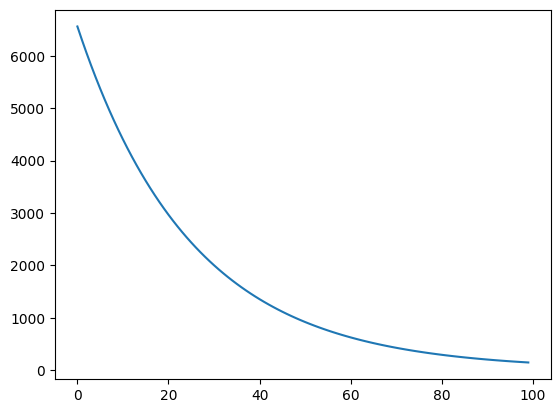

In [132]:
#Convert the training history to a dataframe
history1_df = pd.DataFrame(history.history)

#Use pandas native plot method
history1_df['loss'].plot();

In [134]:
score = model.evaluate(X1_test, y1_test, verbose=0)
score

17.54710578918457